<a href="https://colab.research.google.com/github/urvashi-agrawal-dev/House-prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

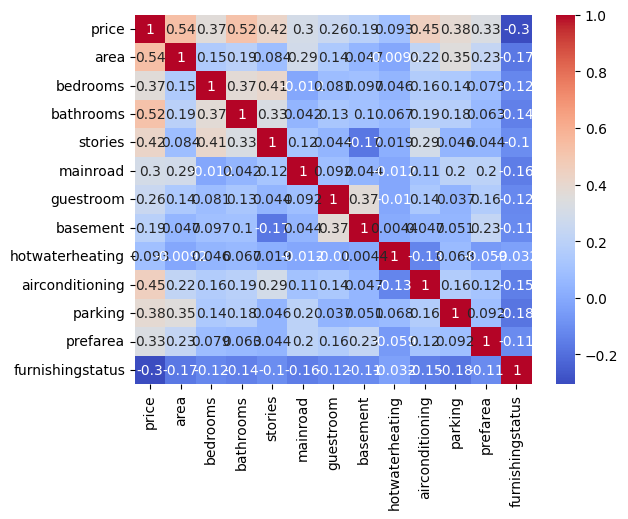

                   Coefficient
area              2.565613e+02
bedrooms          5.202857e+04
bathrooms         1.013709e+06
stories           4.617353e+05
mainroad          4.198883e+05
guestroom         1.518507e+05
basement          4.528301e+05
hotwaterheating   8.706800e+05
airconditioning   7.969789e+05
parking           2.863661e+05
prefarea          7.291144e+05
furnishingstatus -2.486356e+05


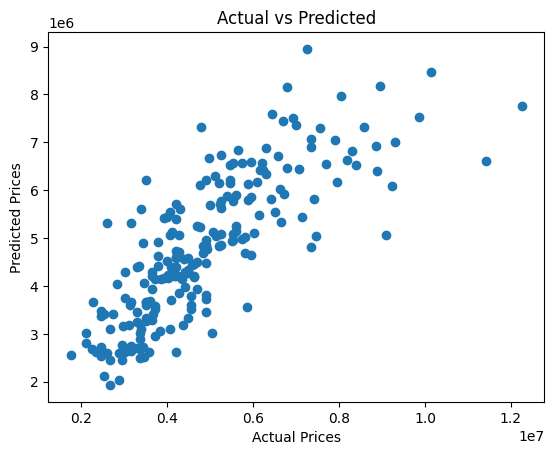

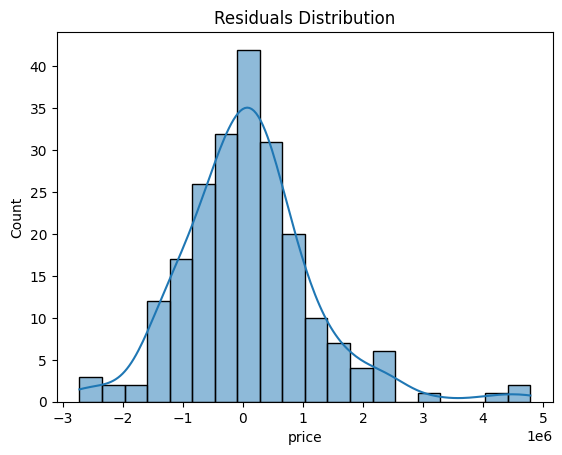

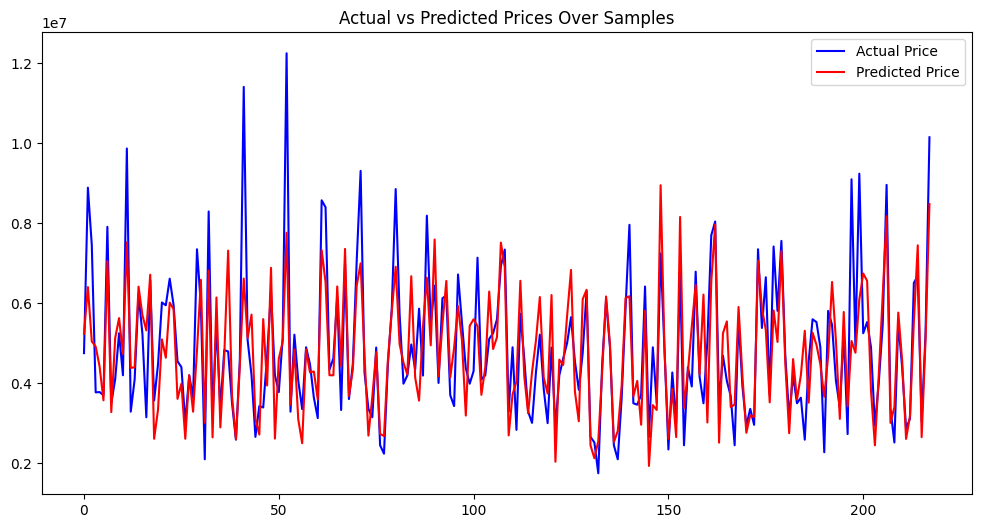

MAE: 794701.1600078318
MSE: 1213781296944.3127
RMSE: 1101717.4306256177


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
HouseDF = pd.read_csv('/content/Housing.csv')  ## we will load the data of housing
le = LabelEncoder() #encode cateogrical var
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    HouseDF[col] = le.fit_transform(HouseDF[col])
sns.heatmap(HouseDF.corr(), annot=True, cmap='coolwarm') # cehck correlation
plt.show()
X = HouseDF[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
             'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']] #features
y = HouseDF['price'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) #train test split
lm = LinearRegression() #train model
lm.fit(X_train, y_train)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df) #printing coeffi
predictions = lm.predict(X_test)#predict
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices") #plot predictions and actual
plt.title("Actual vs Predicted")
plt.show()
sns.histplot(y_test - predictions, kde=True)
plt.title("Residuals Distribution")  #residual dist
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.legend()
plt.title("Actual vs Predicted Prices Over Samples")
plt.show()

# Metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
